# 讀熱編碼(One Hot Encoding)

##### 先引入我所需要的packages

In [1]:
import os 
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# 資料前處理

In [2]:
# 設定檔案存放的路徑
file_path="C:\\Users\\user\\Downloads\\House"
os.chdir(file_path)                                                
file_list = os.listdir()
# 讀取第一個csv檔案
df1 =  pd.read_csv(file_path+"\\"+file_list[0])
# 我們把第一行不需要的資料去除，然後重新排序我們的資料編號(index)
df1 = df1.reindex(df1.index.drop(0)).reset_index(drop=True)
# 去除掉我們不需要的欄位
df1=df1.drop(['土地區段位置建物區段門牌','交易標的', '移轉層次','非都市土地使用分區','非都市土地使用編定','交易年月日',
              '交易筆棟數','總樓層數','建築完成年月','單價元平方公尺','車位類別','車位總價元','備註','有無管理組織',
            '編號','車位移轉總面積平方公尺'], axis=1)
# 我們用一樣的做法處裡第二個csv資料集
df2 =  pd.read_csv(file_path+"\\"+file_list[1])
df2 = df2.reindex(df2.index.drop(0)).reset_index(drop=True)
df2=df2.drop(['土地區段位置建物區段門牌','交易標的', '移轉層次','非都市土地使用分區','非都市土地使用編定','交易年月日',
              '交易筆棟數','總樓層數','建築完成年月','單價元平方公尺','車位類別','車位總價元','備註','有無管理組織',
            '編號','車位移轉總面積平方公尺'], axis=1)
# 我們用一樣的做法處裡第三個csv資料集
df3 =  pd.read_csv(file_path+"\\"+file_list[2])
df3 = df3.reindex(df3.index.drop(0)).reset_index(drop=True)
df3=df3.drop(['土地區段位置建物區段門牌','交易標的', '移轉層次','非都市土地使用分區','非都市土地使用編定','交易年月日',
              '交易筆棟數','總樓層數','建築完成年月','單價元平方公尺','車位類別','車位總價元','備註','有無管理組織',
            '編號','車位移轉總面積平方公尺'], axis=1)
# 我們用一樣的做法處裡第四個csv資料集
df4 =  pd.read_csv(file_path+"\\"+file_list[3])
df4 = df4.reindex(df4.index.drop(0)).reset_index(drop=True)
df4=df4.drop(['土地區段位置建物區段門牌','交易標的', '移轉層次','非都市土地使用分區','非都市土地使用編定','交易年月日',
              '交易筆棟數','總樓層數','建築完成年月','單價元平方公尺','車位類別','車位總價元','備註','有無管理組織',
            '編號','車位移轉總面積平方公尺'], axis=1)
# 最後把四筆資料合併在一起
data=pd.concat([df1,df2,df3,df4])
# 一樣我們重新排序我們資料的編號
data=data.reset_index(drop=True)
data

,鄉鎮市區,土地移轉總面積平方公尺,都市土地使用分區,建物型態,主要用途,主要建材,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,總價元
0,信義區,26.13,住,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,182.23,3,1,2,有,37090000
1,信義區,18.71,住,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,137.07,2,1,1,有,26660000
2,信義區,27.7,住,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,215.06,3,1,2,有,40200000
3,信義區,26.13,住,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,182.25,3,1,2,有,37880000
4,信義區,18.94,住,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,138.55,2,1,1,有,26880000
...,...,...,...,...,...,...,...,...,...,...,...,...
742,松山區,18.1,住,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,137.63,2,1,2,有,28360000
743,北投區,313.18,住,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,371.22,4,3,2,有,75850000
744,北投區,196.29,住,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,236.41,4,2,2,有,48500000
745,北投區,144.11,住,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,176.33,3,2,2,有,30500000


# 正規化(Normalize)

In [3]:
# 創建一個暫時存放運算資料的矩陣
new_data=np.zeros((len(data),6))
# 把有數字的資料挑出來，存入矩陣
new_data[:,0]=data.iloc[:,1].values
new_data[:,1]=data.iloc[:,6].values
new_data[:,2]=data.iloc[:,7].values
new_data[:,3]=data.iloc[:,8].values
new_data[:,4]=data.iloc[:,9].values
new_data[:,5]=data.iloc[:,11].values
# 接著我們用把這六欄資料normalize
for i in range(0,6):
    new_data[:,i]=(new_data[:,i]-np.mean(new_data[:,i]))/np.std(new_data[:,i])
# 最後以dataframe的形式存取
number_dataframe=pd.DataFrame(new_data,columns=['土地移轉總面積平方公尺','建物移轉總面積平方公尺',
                                           '建物現況格局-房','建物現況格局-廳','建物現況格局-衛','總價元'])
number_dataframe

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元
0,0.124849,-0.037870,1.078710,-0.100907,1.081467,-0.226828
1,-0.178195,-0.454258,0.343494,-0.100907,-0.140705,-0.427317
2,0.188970,0.264832,1.078710,-0.100907,1.081467,-0.167047
3,0.124849,-0.037686,1.078710,-0.100907,1.081467,-0.211643
4,-0.168802,-0.440612,0.343494,-0.100907,-0.140705,-0.423088
...,...,...,...,...,...,...
742,-0.203108,-0.449095,0.343494,-0.100907,1.081467,-0.394639
743,11.848393,1.704672,1.813925,2.254634,1.081467,0.518229
744,7.074433,0.461685,1.813925,1.076864,1.081467,-0.007501
745,4.943325,-0.092270,1.078710,1.076864,1.081467,-0.353503


# 鄉鎮區域

In [4]:
# 這裡我們的做法是跑迴圈
# 把鄉鎮區域這個欄位所有出現過的區存到districts裡面
# 方法就是一個一個檢查，沒有出現過在districts裡面
# 我們就把他存到districts裡面
districts=data.iloc[0,0]
for i in range(1,len(data)):
    if(data.iloc[i,0] not in districts):
        districts=districts+" "+data.iloc[i,0]
districts=districts.split()
# 接著我們創建一個暫時存放資料的矩陣
new_data=np.zeros((len(data),len(districts)))
# 分類鄉鎮區域欄位每個資料
# 如果他對應到districts裡面的某個區域
# 就在new_data矩陣相對應的位置標示為1
for i in range(0,len(data)):
    for j in range(0,len(districts)):
        if(data.iloc[i,0]==districts[j]):
            new_data[i,j]=1
            break
# 最後我們把資料以dataframe形式存取
districts_dataframe=pd.DataFrame(new_data,columns=districts)
districts_dataframe

,信義區,中山區,內湖區,大安區,文山區,北投區,中正區,士林區,大同區,萬華區,松山區
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
743,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
744,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
745,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# 都市土地使用分區	

In [5]:
# 這裡我們用一樣的方法處理都市土地使用分區
new_data=np.zeros((len(data),3))
for i in range(0,len(data)):
    if(data.iloc[i,2]=='住'):
        new_data[i,0]=1
    elif(data.iloc[i,2]=='商'):
        new_data[i,1]=1
    else:
        new_data[i,2]=1
use_dataframe=pd.DataFrame(new_data,columns=["住","商","其他(use)"])
use_dataframe

,住,商,其他(use)
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
742,1.0,0.0,0.0
743,1.0,0.0,0.0
744,1.0,0.0,0.0
745,1.0,0.0,0.0


# 建物型態

In [6]:
# 這裡我們用一樣的方法處理建物型態
new_data=np.zeros((len(data),3))
for i in range(0,len(data)):
    if(data.iloc[i,3]=='華廈(10層含以下有電梯)'):
        new_data[i,0]=1
    elif(data.iloc[i,2]=='住宅大樓(11層含以上有電梯)'):
        new_data[i,1]=1
    else:
        new_data[i,2]=1
build_dataframe=pd.DataFrame(new_data,columns=["華廈","住宅大樓","其他(build)"])
build_dataframe

,華廈,住宅大樓,其他(build)
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
742,0.0,0.0,1.0
743,1.0,0.0,0.0
744,1.0,0.0,0.0
745,1.0,0.0,0.0


# 主要用途

In [7]:
# 這裡我們用一樣的方法處理主要用途
new_data=np.zeros((len(data),3))
for i in range(0,len(data)):
    if(data.iloc[i,4]=='住家用'):
        new_data[i,0]=1
    elif(data.iloc[i,2]=='商業用'):
        new_data[i,1]=1
    else:
        new_data[i,2]=1
business_dataframe=pd.DataFrame(new_data,columns=["住家用","商業用","住商用"])
business_dataframe

,住家用,商業用,住商用
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
742,1.0,0.0,0.0
743,1.0,0.0,0.0
744,1.0,0.0,0.0
745,1.0,0.0,0.0


# 主要建材

In [8]:
# 因為主要建材欄位只有兩種
# 所以我們創一個欄位鋼筋混凝土造就好
new_data=np.zeros((len(data)))
for i in range(0,len(data)):
    if(data.iloc[i,5]=='鋼筋混凝土造'):
        new_data[i]=1
    else:
        new_data[i]=0
materials_dataframe=pd.DataFrame(new_data,columns=["鋼筋混凝土造"])
materials_dataframe

,鋼筋混凝土造
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
742,1.0
743,1.0
744,1.0
745,1.0


# 建物現況格局-隔間

In [9]:
# 因為隔間欄位只有有和無兩種
# 所以我們創一個欄位建物現況格局-隔間就好
new_data=np.zeros((len(data),1))
for i in range(0,len(data)):
    if(data.iloc[i,10]=='有'):
        new_data[i]=1
    else:
        new_data[i]=0
inter_dataframe=pd.DataFrame(new_data,columns=["建物現況格局-隔間"])
inter_dataframe

,建物現況格局-隔間
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
742,1.0
743,1.0
744,1.0
745,1.0


# 合併資料

In [10]:
# 最後我們把所有處理過的資料合併在一起
final_data=pd.concat([districts_dataframe,use_dataframe,build_dataframe,business_dataframe,
           materials_dataframe,inter_dataframe,number_dataframe], axis=1)
final_data

,信義區,中山區,內湖區,大安區,文山區,北投區,中正區,士林區,大同區,萬華區,...,商業用,住商用,鋼筋混凝土造,建物現況格局-隔間,土地移轉總面積平方公尺,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.124849,-0.037870,1.078710,-0.100907,1.081467,-0.226828
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,-0.178195,-0.454258,0.343494,-0.100907,-0.140705,-0.427317
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.188970,0.264832,1.078710,-0.100907,1.081467,-0.167047
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.124849,-0.037686,1.078710,-0.100907,1.081467,-0.211643
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,-0.168802,-0.440612,0.343494,-0.100907,-0.140705,-0.423088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,-0.203108,-0.449095,0.343494,-0.100907,1.081467,-0.394639
743,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,11.848393,1.704672,1.813925,2.254634,1.081467,0.518229
744,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,7.074433,0.461685,1.813925,1.076864,1.081467,-0.007501
745,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,4.943325,-0.092270,1.078710,1.076864,1.081467,-0.353503


# 訓練集和測試集

In [11]:
# 這裡我們把資料分成訓練集和測試集
sample = np.random.rand(len(final_data)) <= 0.8
train = final_data[sample]
test = final_data[~sample]
# 我們把我們希望預測的欄位「總價元」分出來
train_x,train_y=train.iloc[:,:27].values,train.iloc[:,27].values
test_x,test_y=test.iloc[:,:27].values,test.iloc[:,27].values
train

,信義區,中山區,內湖區,大安區,文山區,北投區,中正區,士林區,大同區,萬華區,...,商業用,住商用,鋼筋混凝土造,建物現況格局-隔間,土地移轉總面積平方公尺,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.124849,-0.037870,1.078710,-0.100907,1.081467,-0.226828
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,-0.178195,-0.454258,0.343494,-0.100907,-0.140705,-0.427317
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.188970,0.264832,1.078710,-0.100907,1.081467,-0.167047
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,-0.168802,-0.440612,0.343494,-0.100907,-0.140705,-0.423088
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,-0.061389,0.125882,1.078710,1.076864,1.081467,0.079960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,-0.203108,-0.484409,0.343494,-0.100907,1.081467,-0.405211
742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,-0.203108,-0.449095,0.343494,-0.100907,1.081467,-0.394639
743,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,11.848393,1.704672,1.813925,2.254634,1.081467,0.518229
745,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,4.943325,-0.092270,1.078710,1.076864,1.081467,-0.353503


# 梯度下降

In [12]:
def refresh(X,y,w,a):
    # 這裡可以比照公式
    dJ=(X.dot(w.T)-y).dot(X)/len(y)
    # 更新權重
    new_w=w-a*dJ
    return new_w

# 線性回歸演算法

In [13]:
def Regression(a,train_x,train_y,test_x,test_y,p):
    # a：學習速度參數
    # X：資料矩陣
    # w：權重
    # 初始化我們的權重
    w=np.zeros(len(train_x[1,:]))
    T=90000
    # 跑迴圈執行演算法
    for t in range(0,T):
        w=refresh(train_x,train_y,w,a)
    # 計算訓練集錯誤率
    comp_y=train_x.dot(w.T)
    error=0
    for k in range(0,len(train_y)):
        error+=abs(comp_y[k]-train_y[k])
    error=error/len(train_y)
    # 計算測試集錯誤率
    pred_error=0
    pred_y=test_x.dot(w.T)
    for k in range(0,len(pred_y)):
        pred_error+=abs(pred_y[k]-test_y[k])
    pred_error=pred_error/len(test_y)
    # 把結果輸出
    print("Trainging error = ", error,"/","Testing error = ", pred_error)
    # 如果p=1，就繪圖
    if(p==1):
        plt.rcParams["figure.figsize"] = (18,18)
        plt.plot([-2,8],[-2,8],"g-",linewidth=6,label="straight line")
        plt.plot(train_y,comp_y,"bo",markersize=9,label="trainging data")
        plt.plot(test_y,pred_y,"ro",markersize=9,label="testing data")
        plt.xticks(fontsize=30)
        plt.yticks(fontsize=30)
        plt.legend(loc="upper left",fontsize=30)
        plt.grid()
        plt.xlabel("y",fontsize=30)
        plt.ylabel("h(x)",fontsize=30)
        plt.xlim([-2,8])
        plt.ylim([-2,8])
        plt.show()
    # 回傳權重
    return w

# 結果輸出

Trainging error =  0.2256249878009173 / Testing error =  0.24394772622028962


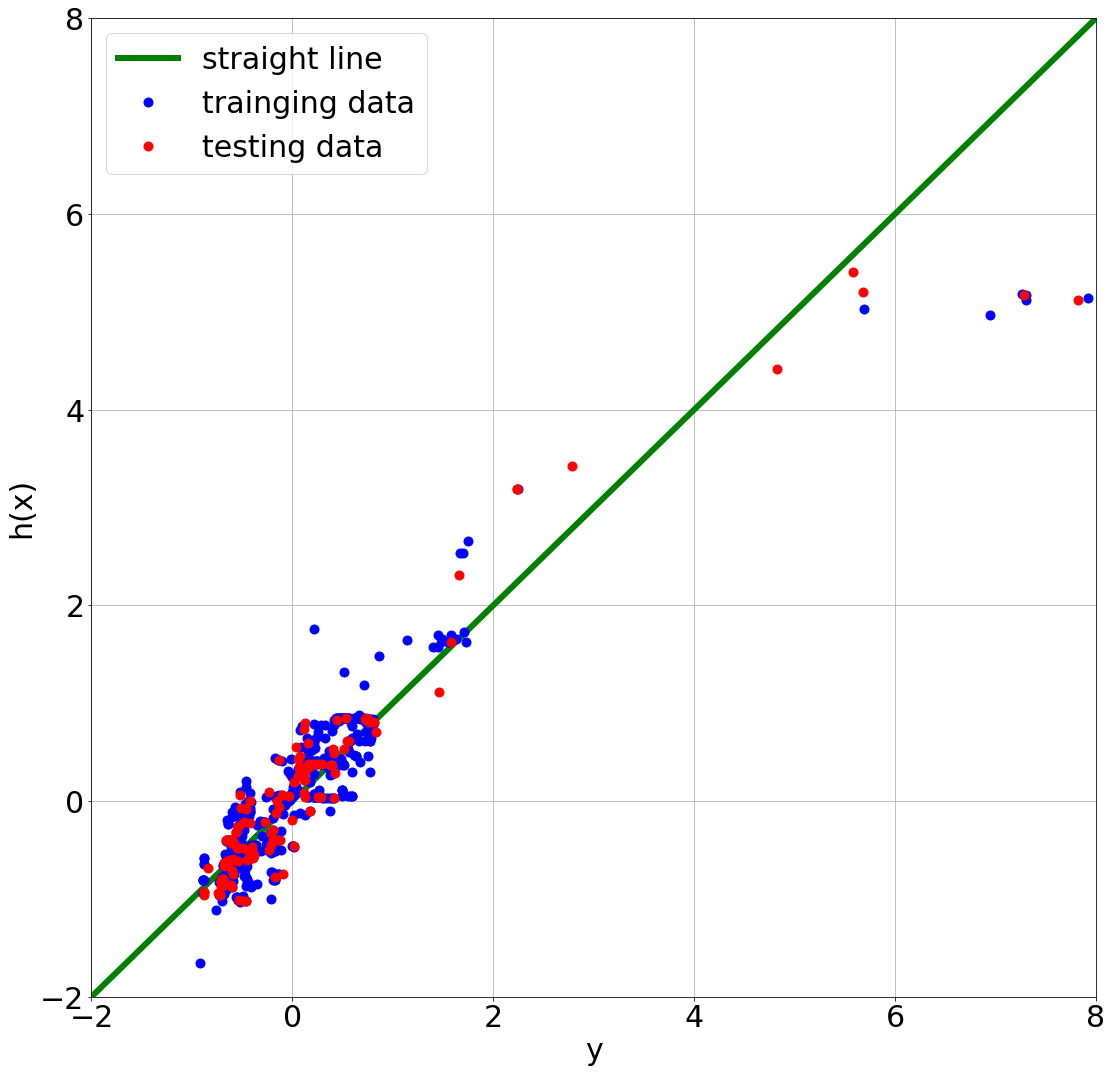

In [14]:
w=Regression(0.3,train_x,train_y,test_x,test_y,1)

# 輸出權重

In [15]:
for i in range (0,27):
    print(final_data.columns[i],"--> 權重: ",w[i])

信義區 --> 權重:  -0.1671472954674888
中山區 --> 權重:  0.017320681439254162
內湖區 --> 權重:  0.12369497099356898
大安區 --> 權重:  0.9950314317232617
文山區 --> 權重:  0.39401149049215217
北投區 --> 權重:  -0.5612332689716315
中正區 --> 權重:  -0.0018775597439805447
士林區 --> 權重:  -0.2057501643055556
大同區 --> 權重:  -1.204534980648642
萬華區 --> 權重:  -0.5245801035624689
松山區 --> 權重:  0.8714362560952033
住 --> 權重:  -0.19526177443185347
商 --> 權重:  0.40081441460264505
其他(use) --> 權重:  -0.46918118212683224
華廈 --> 權重:  0.21992895484465186
住宅大樓 --> 權重:  0.0
其他(build) --> 權重:  -0.48355749680071397
住家用 --> 權重:  -0.2403666157619279
商業用 --> 權重:  0.0
住商用 --> 權重:  -0.02326192619413564
鋼筋混凝土造 --> 權重:  -0.8655186818198592
建物現況格局-隔間 --> 權重:  1.305488640834056
土地移轉總面積平方公尺 --> 權重:  0.002691492488513549
建物移轉總面積平方公尺 --> 權重:  1.2582019932081276
建物現況格局-房 --> 權重:  -0.05793521354191221
建物現況格局-廳 --> 權重:  -0.05952146313990341
建物現況格局-衛 --> 權重:  -0.26125213707878825
